<a href="https://colab.research.google.com/github/rahulbaghel159/learning_journey/blob/main/DM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Mining Assignment (Group 29)
Submitted by:-

Komalchitt Juneja - 2021mt12238

Vidushi Mehta - 2021mt12221

Mrityunjay Chauhan - 2021mt12176

Rahul Baghel - 2021mt12396

# Importing Dataset

Dataset picked from Kaggle in a public Github Repository.

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/rahulbaghel159/kaggle_dataset/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

# Composition of the dataset

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.lower()

# Null Values Handling

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df=df.fillna(np.mean(df['bmi']))
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Although there are no missing values in the dataset anymore, it is important to note at this point that the column 'smoking_status' contains values "Unknown" which means that the information is unavailable for this patient

In [ ]:
df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0], inplace=True)

# Preparing the data

Since we do not need the 'id' column, we will drop the column from our dataset.

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df = df[df['gender'] != 'Other']

In [ ]:
numeric_data=df.loc[:,df.nunique() > 5]
cols = [col for col in df.columns if col not in numeric_data]

categorical_data=df[cols].drop('stroke',axis=1)
numeric_data=pd.DataFrame(numeric_data)
categorical_data=pd.DataFrame(categorical_data)

In [ ]:
print(f'Numerical data: {list(numeric_data)}')
print(f'Categorical data: {list(categorical_data)}')

Numerical data: ['age', 'avg_glucose_level', 'bmi']
Categorical data: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


# Exploratory Data Analysis

**Heatmap**

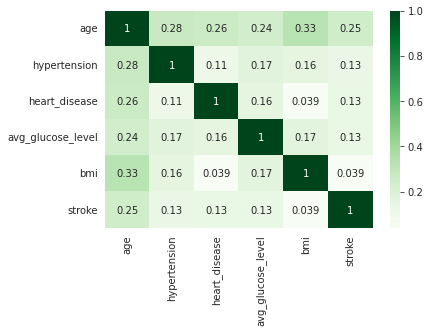

In [ ]:
sns.heatmap(df.corr(), cmap = 'Greens',annot=True);



As visible from the heatmap:

    'age' and 'bmi' are correlated fairly high. This shows that the bmi tends to increase with an increase in age.
    'age' and 'hypertension' are also quite correlated. This is alarming for our society, as this implies poorer mental health conditions among elders.



**Countplot**

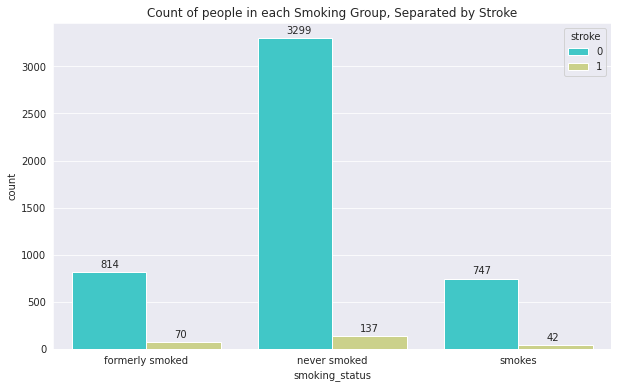

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='smoking_status',data=df, palette='rainbow',hue='stroke')
plt.title("Count of people in each Smoking Group, Separated by Stroke")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))



People who formerly smoked and who smoke show signs of stroke way more than people who never smoked.

**Catplot**

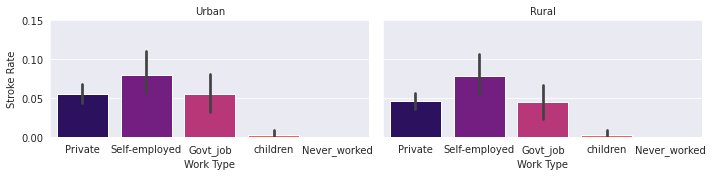

In [ ]:
g = sns.catplot(x='work_type',y='stroke', col = 'residence_type', data=df, kind='bar', palette='magma', saturation =2.5)
(g.set_axis_labels("Work Type", "Stroke Rate").set_titles("{col_name}").set(ylim=(0,0.15)))
g.fig.set_figwidth(10)
g.fig.set_figheight(2)




As visible from the above:

    Living in a rural or urban areas does not affect the risk of stroke in any way.



# Preprocessing

**Standard Scaler**

In [ ]:
num_cols=numeric_data.columns.to_list()
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051242,0,1,Yes,Private,Urban,2.706450,1.001041,formerly smoked,1
1,Female,0.785889,0,0,Yes,Self-employed,Rural,2.121652,-0.000165,never smoked,1
2,Male,1.626174,0,1,Yes,Private,Rural,-0.004867,0.468399,never smoked,1
3,Female,0.255182,0,0,Yes,Private,Urban,1.437473,0.715233,smokes,1
4,Female,1.581949,1,0,Yes,Self-employed,Rural,1.501297,-0.635858,never smoked,1


**Label Encoding**

In [ ]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.706450,1.001041,0,1
1,0,0.785889,0,0,1,3,0,2.121652,-0.000165,1,1
2,1,1.626174,0,1,1,2,0,-0.004867,0.468399,1,1
3,0,0.255182,0,0,1,2,1,1.437473,0.715233,2,1
4,0,1.581949,1,0,1,3,0,1.501297,-0.635858,1,1


**Oversampling**



    SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In simpler terms, there is not much data that will help the model to learn to predict 'stroke=1' as compared to 'stroke=0', so it will tend to classify most of the test data as non-stroke.

We overcome this by using resampling.

In [ ]:
training_data=df.copy()
x= training_data.drop(['stroke'],axis=1)
y= df['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train,y_train)


# Modelling

In [ ]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
lr_f1 = f1_score(lr_pred, y_test)
lr_acc

0.7563600782778865

In [ ]:
decision_tree = DecisionTreeClassifier()   
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.8385518590998043

In [ ]:
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.8737769080234834

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.7602739726027398

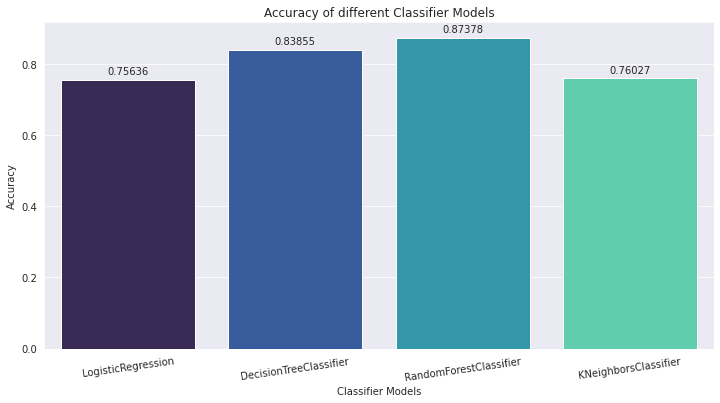

In [ ]:
models_names = ["LogisticRegression",'DecisionTreeClassifier','RandomForestClassifier',
                    'KNeighborsClassifier']
models_acc=[lr_acc,dt_acc,rf_acc,knn_acc]

plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=models_names, y=models_acc, palette = "mako", saturation =1.5)
plt.xlabel('Classifier Models' )
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,5)}', (x + width/2, y + height*1.02), ha='center', fontsize = 10)
plt.show()